## 4.1 Maximum likelihood estimation

$n$개의 랜덤 벡터 $Y_1,\dots,Y_n$이 있고, 이 벡터들의 분포는 알지 못하는 변수 $\psi$에 의해 결정된다고 합시다. 이 변수가 특정 값으로 주어졌을 때 관측치에 대한 결합밀도를 $p(y_1,\dots,y_n;\psi)$로 표기하겠습니다. 가능도 함수는 관측 데이터에 대한 확률밀도를 $\psi$에 대한 함수로 표현한 것으로 정의됩니다. 가능도 함수를 $L$로 표기하면 $L(\psi)=const\cdot p(y_1,\dots,y_n;\psi)$로 쓸 수 있습니다. DLM의 경우 관측치에 대한 결합밀도를 다음과 같이 쓰면 편합니다.

$$p(y_1,\dots,y_n;\psi)=\prod_{t=1}^{n}p(y_t|y_{1:t-1};\psi)\tag{4.1}$$

여기서 $p(y_t|y_{1:t-1};\psi)$는 $\psi$가 알지 못하는 변수의 값이라고 가정했을 때, 시간 $t-1$까지의 데이터가 주어 졌을 때 $y_t$에 대한 조건부 밀도 입니다. 2장을 통해 식(4.1)의 RHS 항은 평균이 $f_t$이고 분산이 $Q_t$인 가우시안 밀도라는 것을 알고 있습니다. 따라서 가능도 함수를 다음과 같이 쓸 수 있습니다.

$$\ell(\psi)=-\frac{1}{2}\sum_{t=1}^{n}log|Q_t|-\frac{1}{2}\sum_{t=1}^{n}(y_t-f_t)'Q_t^{-1}(y_t-f_t)\tag{4.2}$$

여기서 $f_t$와 $Q_t$는 $\psi$에 의해 결정됩니다. 식(4.2)의 최대값은 $\psi$의 MLE를 취해 얻을 수 있습니다. 

$$\hat{\psi}=argmmax_{\psi}\ell(\psi)\tag{4.3}$$

H를 $\psi=\hat{\psi}$에서 구한 $-\ell(\psi)$의 Hessian 행렬이라고 합시다. 행렬 $H^{-1}$는 MLE의 분산 $Var(\hat{\psi})$에 대한 추정값 입니다. MLE의 일치 조건(conditions for consistency)과 점근 정규성(asymptotic normality)는 Caiines(1988)과 Hannan, Deistler(1988)에서 확인 가능합니다. 기본적인 내용은 Shumway, Stoffer(2000)을 참고하기 바랍니다. 하지만 일반적올 사용되는 DLM의 대부분은 MLE의 일반적인 일치성과 점근 정규성이 유지됩니다.

다음으로 수치 최적화에 대한 주의사항들이 있습니다. DLM의 가능도 함수는 많은 국부 최적점을 가질 수 있습니다. 이는 최적화를 다른점에서 시작함에 따라 다른 최적점이 계산될 수 있음을 의미합니다. MLE를 찾는데 있어 다소 평평한 가능도 함수는 또다른 문제가 될 수 있습니다. 이러한 경우, 다른점에서 시작한 최적화가 매우 다른 위치의 최적점으로 결정될 수 있고 이 다른 위치의 값들이 거의 같을 수 있습니다. MLE 분산의 추정치는 보통 매우 큰 값을 갖습니다. 이는 모델이 식별하기 어려운 상태임을 의미합니다. 이에 대한 해결책으로는 모델을 단순화 하고, 일부 변수들을 제거하는 방법이 있습니다. 반면, 스무딩 또는 예측이 목적인 경우 모델이 변수에 대해 잘 식별되지 않아도 좋은 결과가 산출되는 경우도 있습니다.

R은 **dlm** 패키지 내의 **dlmMLE**함수를 가지고 있으며 이 함수 내에는 **optim**함수가 있어 매우 강력한 최적화 기능을 가집니다. 최적화 문제에서 함수를 최소화 하는 것은 일반적이며, **optim**는 예외없이 사용됩니다. 통계학자들도 MLE를 찾을 때 음의 로그 가능도 함수를 최소화 하는 방향으로 생각하는 경향이 있습니다. 이러한 관점에서 함수 **dlmLL**는 주어진 데이터에 대해 DLM의 음의 로그 가능도 함수를 출력(return)합니다. 관심있는 DLM의 정의에 포함된 변수 $\psi$에 대하여, DLM을 먼저 구성하고 구성한 DLM의 음의 로그 가능도 함수를 평가할 수 있습니다. 이는 아래의 단계료 표현 됩니다.

$$\psi \xrightarrow{build} DLM \xrightarrow{loglik.} -\ell(\psi)$$

위의 과정은 **dlmMLE**가 정확히 수행하는 과정입니다. 사용자 정의 함수 **build**로 DLM을 만들고 **dlmLL**로 새로운 함수를 정의하여 실체 최소화를 위해 결과를 **optim**으로 전달합니다. 예를들어, Lake Superior (91 페이지 참조)의 연간 강수량 데이터를 고려해 봅시다. 이 데이터에 대한 그래프를 그려보면, 이 현상을 1차 다항식으로 모델링하는 것이 적절하다는 것을 판단할 수 있습니다. 아래의 코드는 V와 W의 MLE를 어떻게 찾는지 보여줍니다. 

In [1]:
require("dlm")

Loading required package: dlm
Warning message:
"package 'dlm' was built under R version 3.6.3"

In [2]:
y <- ts(read.table("pgreat1.dat",skip=3),start=c(1900,1))

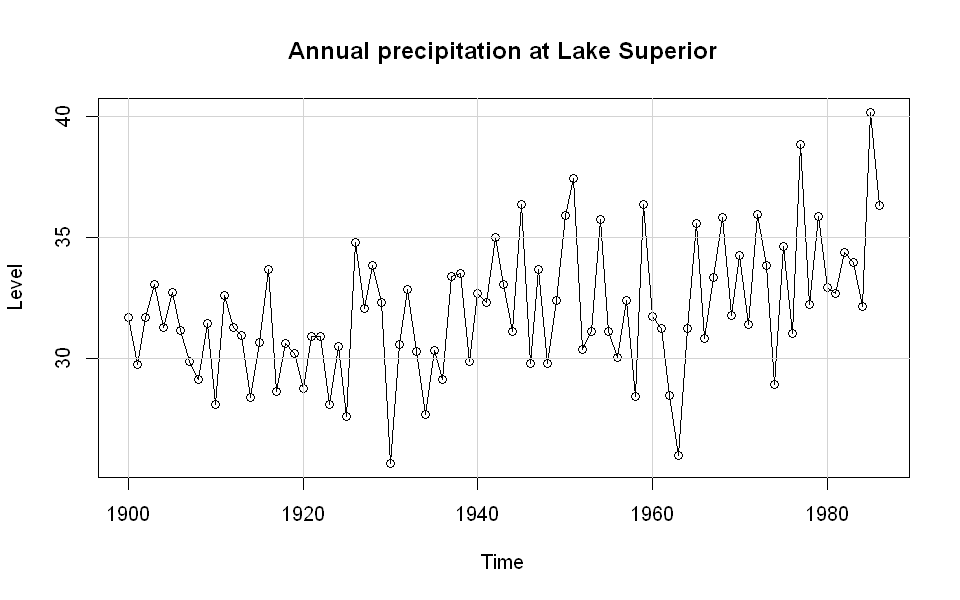

In [3]:
plot(y,type="o",ylab='Level',)
options(repr.plot.width=8, repr.plot.height=5); grid(lty=1);
title("Annual precipitation at Lake Superior")

In [4]:
# Create an n-th order polynomial DLM
build <- function(parm){
    dlmModPoly(order = 1, dV = exp(parm[1]), dW = exp(parm[2]))
}

In [5]:
# Parameter estimation by maximum likelihood
fit <- dlmMLE(y, rep(0,2), build)

In [6]:
# Check Convergence
fit$convergence

[1] 0

In [7]:
unlist(build(fit$par)[c("V","W")])

V          W 
5.86686746 0.08833584

최적화 중 음의 변수 값을 찾는 경우를 피하기 위해 알지 못하는 두개 분산 값에 로그를 취한 값을 구했습니다. **dlmMLE**의 출력 값은 **optim**를 호출하여 생성된 리스트 입니다. **convergence**는 항상 확인해야 됩니다. 0이 아닌 값이 나온 경우 수렴하지 않았음을 의미합니다. **dlmMLE**는 **optim**에 추가적인 입력을 제공할 수 있도록 "..."의 입력항을 가집니다. 예를들어, **hessian=TRUE**라는 입력을 **optim**에 포함시키고 **optim**을 호출하면, **optim**은 최소값에서 수치적으로 계산한 Hessian도 출력합니다. 이는 MLE 성분의 표준 오차를 추정하거나 분산 행렬을 추정하는데 사용될 수 있습니다. 앞선 예제에서 $\psi=(log(V),log(W))$의 형태로 모델을 변수화 했기 때문에, Hessian으로 추정한 표준 오차는 이 변수들의 MLE가 됩니다. V와 W의 MLE에 대한 표준 오차를 얻기 위해서는 델타 방법을 사용할 수 있습니다. 델타 방법의 일반적인 다변수 형태에 대해 상기해 봅시다. $\psi$가 $h$차원이고, $g:\mathbb{R}^h\to\mathbb{R}^k$의 미분은 연속이라고 가정해 봅시다. 임의의 $\psi=(\psi_1,\dots,\psi_h)\in\mathbb{R}^h$에 대하여 $g(\psi)=(g_1(\psi),\dots,g_k(\psi))$라고 쓰고, g의 미분을 $k\times h$행렬로 정의합시다.

$$D_g=
\begin{bmatrix}
\frac{\partial{g_1}}{\partial{\psi_1}} && \dots && \frac{\partial{g_1}}{\partial{\psi_h}} \\
\dots && \dots && \dots \\
\frac{\partial{g_k}}{\partial{\psi_1}} && \dots && \frac{\partial{g_k}}{\partial{\psi_h}}
\end{bmatrix}
\tag{4.4}$$

즉, $D_g$의 $i$번째 열은 $g_i$의 gradient입니다. 만약 $\hat{\Sigma}$가 MLE $\hat{\psi}$의 분산 행렬의 추정치라면, $g(\hat{\psi})$는 $g(\psi)$의 MLE가 되며, $g(\psi)$의 추정 분산은 $D_g(\hat{\psi})\hat{\Sigma}D_g(\hat{\psi})'$가 됩니다. 이 예제에서 $g(\psi)=(exp(\psi_1),exp(\psi_2))$이므로,

$$D_g(\psi)=
\begin{bmatrix}
exp(\psi_1)&&0\\
0&&exp(\psi_2)
\end{bmatrix}
\tag{4.5}$$

다음의 R 코드처럼 추정 분산에 대한 표준 오차를 구하기 위하여 최소값에서의 음의 로그 가능도함수와 델타 방법을 사용할 수 있습니다.

In [8]:
fit <- dlmMLE(y, rep(0,2), build, hessian = TRUE)
avarLog <- solve(fit$hessian)
avar <- diag(exp(fit$par)) %*% avarLog %*% diag(exp(fit$par)) # Delta method
sqrt(diag(avar)) # estimated standard errors

[1] 0.94968451 0.08177872

델타 방법에 대한 대안으로 새로운 변수인 $g(\psi)$와 $g(\hat{psi})$에 대한 함수로 표현되는 로그 가능도 함수의 Hessian을 수치적으로 계산할 수 있습니다. **nlme** 패키지는 **fdHess**함수를 제공하며 다음과 같이 사용할 수 있습니다.

In [9]:
library("nlme")

Warning message:
"package 'nlme' was built under R version 3.6.3"

In [10]:
avar1 <- solve(fdHess(exp(fit$par), function(x) dlmLL(y,build(log(x))))$Hessian)
sqrt(diag(avar1))

[1] 0.94962318 0.08172945

이 예제에서 모델을 V, W에 대하여 작성하고 **dlmMLE**로 출력되는 Hessian을 사용하여 추정 표준 오차를 직접 계산할 수 있습니다. 하지만 이 경우 변수 공간 제한에 대해 유의해야 하며 두 변수들의 최저 한계를 설정해야 합니다. 기본 설정 최적화 방법인 **L-BFGS-B**는 변수 공간 제안을 허용하는 유일한 방법입니다. 다음의 코드는 V에 대한 최저 한계를 $10^{-6}$으로 설정했을 때 **dlm**의 함수들은 행렬 V가 특이행렬이 아니어야 함을 요구하는 것을 보여줍니다. 데이터의 크기를 고려했을 때 대부분의 경우 $10^{-6}$은 0으로 고려할 수 있습니다. 

In [11]:
build <- function(parm){
    dlmModPoly(order = 1, dV = parm[1], dW = parm[2])
}
fit <-dlmMLE(y, rep(0.23,2), build, lower = c(1e-6,0), hessian = T)
fit$convergnece

NULL

In [12]:
unlist(build(fit$par)[c("V","W")])

V          W 
5.86677428 0.08833798

In [13]:
avar <- solve(fit$hessian)
sqrt(diag(avar))

[1] 0.94965179 0.08176313

결론을 짓기 위해 기본 R에 포함된 **StructTS**함수에 대해 소개하겠습니다. 이 함수는 특정 단변수 DLM의 분산에 대한 MLE를 찾는데 사용할 수 있습니다. 입력변수인 **type**은 사용할 모델을 선택하는데 사용합니다. 1차 다항식 (**type="level"**)과 2차 다항식(**type=""trend"**), 그리고 2차 다항식에 주기 성분이 포함된 경우(**type="BSM"**)의 모델을 사용할 수 있습니다. 표준 오차는 **StructTS**로 산출되지 않으며 결과로 계산하기도 쉽지 않습니다.

In [14]:
StructTS(y, "level")


Call:
StructTS(x = y, type = "level")

Variances:
  level  epsilon  
0.08834  5.86687  